# Edamame regression module

In [2]:
import pandas as pd 
#from edamame import eda 
import edamame
import edamame.eda as eda
import numpy as np 
from edamame.regressor import TrainRegressor, RegressorDiagnose
# eda version
edamame.__version__

'0.46'

In [3]:
# matrice di regressione
X = pd.read_csv('X.csv', sep = ';')
eda.dimensions(X)

Rows: 13580, Columns: 17

In [4]:
X.head()

,Suburb,Rooms,Type,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
0,Other,2,h,S,Other,-1.303179,-0.422415,-0.955838,-0.780235,-0.900089,-0.112757,-0.000485,0.000000,0.121160,0.030640,Northern Metropolitan,-0.784625
1,Other,2,h,S,Other,-1.303179,-0.422415,-0.955838,-0.780235,0.282403,-0.124303,-0.186650,-2.232709,0.016437,-0.017478,Northern Metropolitan,-0.784625
2,Other,3,h,SP,Other,-1.303179,-0.422415,0.085083,0.673406,0.282403,-0.129825,-0.005505,-2.232709,-0.001227,-0.007855,Northern Metropolitan,-0.784625
3,Other,3,h,PI,Other,-1.303179,-0.422415,0.085083,0.673406,-0.900089,-0.139865,-0.000485,0.000000,0.155226,0.016204,Northern Metropolitan,-0.784625
4,Other,4,h,VB,Nelson,-1.303179,-0.422415,0.085083,-0.780235,0.282403,-0.133339,-0.025916,1.702236,0.025269,-0.010742,Northern Metropolitan,-0.784625


In [5]:
y = pd.read_csv('y.csv', sep = ';')
eda.dimensions(y)

Rows: 13580, Columns: 1

In [6]:
X_train, y_train, X_test, y_test = eda.setup(X,y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10185, 44)
(3395, 44)
(10185, 1)
(3395, 1)


## Regression models

In [7]:
regressor = TrainRegressor(X_train, np.log(y_train), X_test, np.log(y_test))
# linear model 
linear = regressor.linear()
regressor.model_metrics()

### linear model metrics:

,Train,Test
R2,0.731559,0.735602
MSE,0.074245,0.074069
MAE,0.208320,0.206777


'unable to show lasso model metrics'

'unable to show ridge model metrics'

'unable to show tree model metrics'

'unable to show random_forest model metrics'

'unable to show xgboost model metrics'

In [12]:
regressor.save_model(model_name="linear")

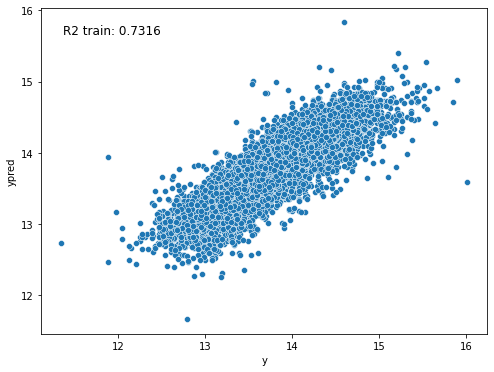

In [8]:
diagnose = RegressorDiagnose(X_train, np.log(y_train), X_test, np.log(y_test))
diagnose.prediction_error(model=linear)

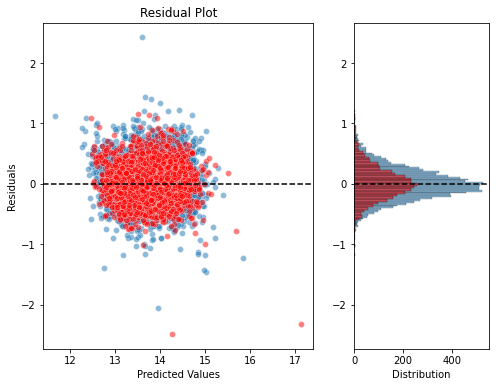

In [9]:
diagnose.residual_plot(model=linear)

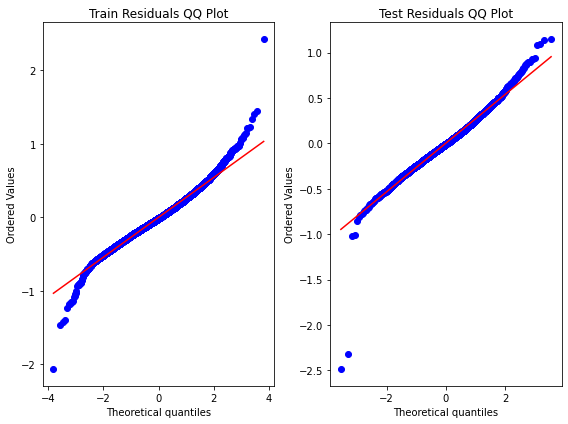

In [10]:
diagnose.qqplot(model=linear)

### Load a model

In [13]:
from edamame.regressor import regression_metrics

In [14]:
linear_upload = eda.load_model(path="linear.pkl")
regression_metrics(linear_upload, X_train, np.log(y_train))

### Model metrics:

,Values
R2,0.731559
MSE,0.074245
MAE,0.208320


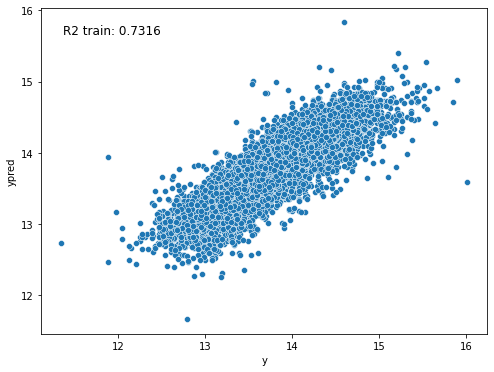

In [15]:
# diagnonse on uploaded model 
diagnose.prediction_error(model=linear_upload)